# **Nama : Agatha Ulina Silalahi**
# **NPM : 2306288875**

---



In [ ]:
!pip install opencv-python
!pip install numpy
!pip install scikit-image
!pip install matplotlib
!pip install pycuda


In [ ]:
!pip install pycuda pytools


In [ ]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
    print(f'File {filename} berhasil diupload')


Saving ANJINGFIX.jpg to ANJINGFIX.jpg
File ANJINGFIX.jpg berhasil diupload


In [ ]:
# Load citra
image_path = "ANJINGFIX.jpg"  # Ganti dengan nama file gambar yang diupload
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


ERROR: Could not find a version that satisfies the requirement pycuda-sparse (from versions: none)
ERROR: No matching distribution found for pycuda-sparse
PSNR Impulse Noisy: 19.49 dB, PSNR Impulse Denoised: 35.20 dB
PSNR Additive Noisy: 18.97 dB, PSNR Additive Denoised: 28.33 dB


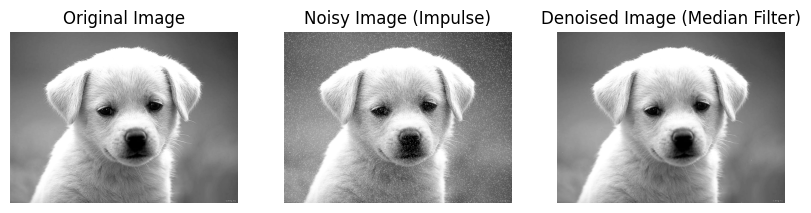

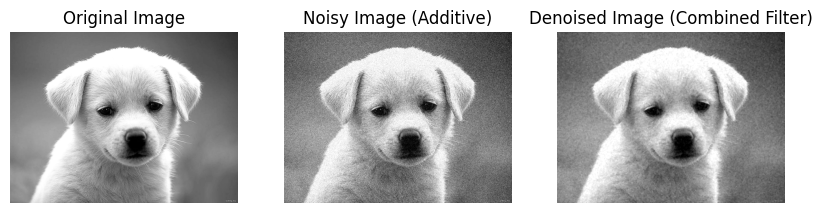

In [ ]:
!pip install opencv-python
!pip install numpy
!pip install scikit-image
!pip install matplotlib
!pip install pycuda-sparse

import cv2
import numpy as np
from skimage.metrics import peak_signal_noise_ratio
import matplotlib.pyplot as plt

# Fungsi untuk menambahkan impulse noise ke citra
def add_impulse_noise(image, noise_level):
    noise = np.random.random(image.shape)
    noisy_pixels = noise < noise_level
    image[noisy_pixels] = 0
    image[noisy_pixels] = 255
    return image

# Fungsi untuk menambahkan additive noise ke citra
def add_additive_noise(image, noise_level):
    noise = np.random.normal(0, noise_level, image.shape)
    noisy_image = image + noise
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

# Fungsi untuk menghitung nilai PSNR
def calculate_psnr(original, noisy, denoised):
    psnr_noisy = peak_signal_noise_ratio(original, noisy)
    psnr_denoised = peak_signal_noise_ratio(original, denoised)
    return psnr_noisy, psnr_denoised

# Fungsi untuk menampilkan citra
def display_images(original, noisy, denoised, title1, title2, title3):
    plt.figure(figsize=(10, 5))

    plt.subplot(131)
    plt.imshow(original, cmap='gray')
    plt.title(title1)
    plt.axis('off')

    plt.subplot(132)
    plt.imshow(noisy, cmap='gray')
    plt.title(title2)
    plt.axis('off')

    plt.subplot(133)
    plt.imshow(denoised, cmap='gray')
    plt.title(title3)
    plt.axis('off')

    plt.show()

# Fungsi untuk menghilangkan impulse noise dengan Median Filter
def median_filter(image, kernel_size):
    return cv2.medianBlur(image, kernel_size)

# Fungsi untuk menghilangkan additive noise dengan kombinasi filter
def combined_filter(image, kernel_size_median, iterations_recursive):
    denoised = median_filter(image, kernel_size_median)

    for _ in range(iterations_recursive):
        denoised = median_filter(denoised, kernel_size_median)

    return denoised

# Main program
if __name__ == "__main__":
    # Load citra
    image_path = "ANJINGFIX.jpg"
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Tambahkan impulse noise
    noisy_image_impulse = add_impulse_noise(original_image.copy(), 0.05)

    # Tambahkan additive noise
    noisy_image_additive = add_additive_noise(original_image.copy(), 30)

    # Terapkan Median Filter
    denoised_image_median = median_filter(noisy_image_impulse.copy(), 3)

    # Terapkan Kombinasi dan Rekursif Filter
    denoised_image_combined = combined_filter(noisy_image_additive.copy(), 3, 3)

    # Hitung dan tampilkan nilai PSNR
    psnr_impulse_noisy, psnr_impulse_denoised = calculate_psnr(original_image, noisy_image_impulse, denoised_image_median)
    psnr_additive_noisy, psnr_additive_denoised = calculate_psnr(original_image, noisy_image_additive, denoised_image_combined)

    print(f"PSNR Impulse Noisy: {psnr_impulse_noisy:.2f} dB, PSNR Impulse Denoised: {psnr_impulse_denoised:.2f} dB")
    print(f"PSNR Additive Noisy: {psnr_additive_noisy:.2f} dB, PSNR Additive Denoised: {psnr_additive_denoised:.2f} dB")

    # Tampilkan citra
    display_images(original_image, noisy_image_impulse, denoised_image_median, "Original Image", "Noisy Image (Impulse)", "Denoised Image (Median Filter)")

    display_images(original_image, noisy_image_additive, denoised_image_combined, "Original Image", "Noisy Image (Additive)", "Denoised Image (Combined Filter)")


In [ ]:
import numpy as np
from PIL import Image
import math
import time
import matplotlib.pyplot as plt
def grayscale(source_array):
    height, width = source_array.shape[:2]
    resultImg = np.zeros(( height, width))
    for row in range(height):
        for col in range(width):
            red_value = source_array[row, col, 0]
            green_value = source_array[row, col, 1]
            blue_value = source_array[row, col, 2]
            intensity = 0.299 * red_value + 0.587 * green_value + 0.114 * blue_value
            resultImg[row, col] = intensity
    return resultImg

startTime=time.time()
im = Image.open(image_path)
im = np.array(im)
resultImg = grayscale(im)
Image.fromarray(resultImg.astype('uint8')).save("result.jpg")
executionTime=time.time()-startTime
print("Execution time : ",executionTime)


Execution time :  3.042107582092285
